# Week 7

This week, more Numpy will be covered, but the main focus will be **plotting** using matplotlib. The data we will analyze comes as an openly accessible [dataset](https://data.caltech.edu/records/s0vdx-0k302) from Caltech, in which two mice were filmed as they were interacting and their positions were tracked ([video demo](https://drive.google.com/file/d/1kmV-OqB9TZIKC7AOMQxpg2ozvl_ShD7y/view), [paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC11067713/)).

## Part 1.

First, let's download and unzip the data:

In [3]:
import os, requests, zipfile

fname = 'task1_classic_classification.zip'
url = "https://data.caltech.edu/records/s0vdx-0k302/files/task1_classic_classification.zip?download=1"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("Problem connecting")
  else:
    if r.status_code != requests.codes.ok:
      print("Problem downloading")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)
else:
  print('Already downloaded')

Already downloaded


In [4]:
import os, zipfile

if not os.path.exists('task1_classic_classification'):
  with zipfile.ZipFile(fname, 'r') as zf:
    zf.extractall('.')

Next, let's check what we downloaded. From the readme file:

- **Task 1: Classic Classification** contains train and test sets for the classic classification task, where the train and test set are annotated by the same annotator for the same behaviors. The behavior mapping is:
```
{'attack': 0, 'investigation': 1, 'mount': 2, 'other': 3}
```

The layout of the `"calms21_task1_*.json"` files:
```json
{
    "annotator-id_0":{
        "task1/train/mouse001_task1_annotator1": {
            "keypoints": [],
            "scores": [],
            "annotations": [],
            "metadata": {}
        },
        "task1/train/mouse002_task1_annotator1": {
            "keypoints": [],
            "scores": [],
            "annotations": [],
            "metadata": {}        
        },
    }
}
```

The `"taskprog_features_task1_*.json"` files have the same layout, except containing `features` instead of `keypoints`, `scores`, and `annotations`.

***This week, exercises are marked like this:***
> Read the .json file and save its contents into `data` variable:

In [8]:
import json

json_path = './task1_classic_classification/calms21_task1_train.json' #. means current folder

with open(json_path, 'r') as f:
    data = json.loads(f.read())
# your code

 As the object is large, simply printing it out is inconvenient. Instead, check its type first:

In [9]:
type(data)

dict

It's a dictionary! So, instead of printing everything, we can check its length and keys:

In [10]:
print(len(data))
data.keys()

1


dict_keys(['annotator-id_0'])

Having a dictionary with one key is not very practical.
> Flatten the dictionary - save its value into the same `data` variable. Then check the length and type of the result.

In [12]:
# your code
data = data['annotator-id_0']

In [13]:
print(len(data))
data.keys()

70


dict_keys(['task1/train/mouse001_task1_annotator1', 'task1/train/mouse002_task1_annotator1', 'task1/train/mouse003_task1_annotator1', 'task1/train/mouse004_task1_annotator1', 'task1/train/mouse005_task1_annotator1', 'task1/train/mouse006_task1_annotator1', 'task1/train/mouse007_task1_annotator1', 'task1/train/mouse008_task1_annotator1', 'task1/train/mouse009_task1_annotator1', 'task1/train/mouse010_task1_annotator1', 'task1/train/mouse011_task1_annotator1', 'task1/train/mouse012_task1_annotator1', 'task1/train/mouse013_task1_annotator1', 'task1/train/mouse014_task1_annotator1', 'task1/train/mouse015_task1_annotator1', 'task1/train/mouse016_task1_annotator1', 'task1/train/mouse017_task1_annotator1', 'task1/train/mouse018_task1_annotator1', 'task1/train/mouse019_task1_annotator1', 'task1/train/mouse020_task1_annotator1', 'task1/train/mouse021_task1_annotator1', 'task1/train/mouse022_task1_annotator1', 'task1/train/mouse023_task1_annotator1', 'task1/train/mouse024_task1_annotator1', 'task

You should see a set of keys. They seem to mark different animal IDs.
> Save animal IDs into a list, then select only data from the first animal into variable `trial`. It will be a dictionary again. Check the length and keys of the data inside `trial`.

In [14]:
# your code
IDs = list(data.keys())
IDs

['task1/train/mouse001_task1_annotator1',
 'task1/train/mouse002_task1_annotator1',
 'task1/train/mouse003_task1_annotator1',
 'task1/train/mouse004_task1_annotator1',
 'task1/train/mouse005_task1_annotator1',
 'task1/train/mouse006_task1_annotator1',
 'task1/train/mouse007_task1_annotator1',
 'task1/train/mouse008_task1_annotator1',
 'task1/train/mouse009_task1_annotator1',
 'task1/train/mouse010_task1_annotator1',
 'task1/train/mouse011_task1_annotator1',
 'task1/train/mouse012_task1_annotator1',
 'task1/train/mouse013_task1_annotator1',
 'task1/train/mouse014_task1_annotator1',
 'task1/train/mouse015_task1_annotator1',
 'task1/train/mouse016_task1_annotator1',
 'task1/train/mouse017_task1_annotator1',
 'task1/train/mouse018_task1_annotator1',
 'task1/train/mouse019_task1_annotator1',
 'task1/train/mouse020_task1_annotator1',
 'task1/train/mouse021_task1_annotator1',
 'task1/train/mouse022_task1_annotator1',
 'task1/train/mouse023_task1_annotator1',
 'task1/train/mouse024_task1_annot

In [15]:
trial = data[IDs[0]]

In [17]:
print(len(trial))
trial.keys()

4


dict_keys(['annotations', 'keypoints', 'metadata', 'scores'])

## Part 2.

As data documentaton tells us, we have annotations (a description of what the animals are doing), keypoints (the coordinates of animal body parts), metadata, and scores. We will ignore the last two and try to extract some insights about animal movement by plotting. Let's use Numpy arrays instead of lists for efficiency and extra funtcionality.
> Create two numpy arrays: `annot`, containing the behavior labels, and `keypoints`, containing the coordinate data. Print out the shapes of created arrays.

In [18]:
# your code
import numpy as np

annot = np.array(trial['annotations'])
keypoints = np.array(trial['keypoints'])

In [19]:
np.shape(annot)

(21364,)

In [20]:
np.shape(keypoints)

(21364, 2, 2, 7)

In [21]:
keypoints[0, 0, 0 , 0]

831.6592041015625

The keypoints data is not very informative by itself. We need to extract some interesting and informative features.

The **dimensions** of the `keypoints` array are:
- frames (time points)
- mouse ID (mouse 0 is the resident, mouse 1 is the intruder)
- x and y coordinates
- body part index (nose, left ear, right ear, neck, left hip, right hip, tail base).

Animals communicate by scent, so we'll assume that nose-nose distance will show animals approaching each other, while nose-tail distances will show investigation.

> Extract 3 features (perform calculations and save results into new variables): distance between noses, distance between nose0 and tail1, and distance between nose1 and tail0. Use Euclidean distance formula.

In [28]:
# your code
resident_nose = keypoints[:, 0, :, 0]
intruder_nose = keypoints[:, 1, :, 1]
resident_tail = keypoints[:, 0, :, -1]
intruder_tail = keypoints[:, 1, :, -1]

nosenose = np.sum(np.sqrt((resident_nose - intruder_nose)**2), axis = 1)
nosetail0 = np.sum(np.sqrt((resident_nose - intruder_tail)**2), axis = 1)
nosetail1 = np.sum(np.sqrt((resident_tail - intruder_nose)**2), axis = 1)


## Part 3.

Let's get to plotting! For this, we will use the `matplotlib.pyplot` package. It is very versatile and therefore often used, and while it may not be the most easy package to use, it has pretty much unlimited functionality, up to image processing. It often has several approaches for obtaining the same result, depending on what seems to be more convenient or intuitive to the coder.

Don't expect to learn Matplotlib in one week. Instead, you can refer to several [cheatsheets](https://matplotlib.org/cheatsheets/).

The Matplotlib syntax introduced during this course is simple, consistent, and scalable. We will create figures as `figure` objects, and add elements using `axis` objects. So, the figure can be thought of as a canvas, and the axes - as the things showing the data (so we can have several plots in one canvas). This syntax looks like this:

```python
import matplotlib.pyplot as plt

# subplots() creates a figure with the possibility to define the grid of `axis` objects.
# When used without arguments, a single axis will be inside.
# The figure object is stored in fig, and the axis in ax:
fig, ax = plt.subplots()  

# Now we can produce a lineplot, which is the default kind of plot:
ax.plot(data_x, data_y)

# Lastly, we need to show the plot inside Notebook:
plt.show()
```

Various additional parameters can be set like this:
```python
ax.set(title='The title of your plot',
  xlabel='Name of X axis',
  ylabel='Name of Y axis'
  )
```

Inspect this example with random data:

In [26]:
!pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 3.4 MB/s eta 0:00:03
   -------- ------------------------------- 1.6/7.8 MB 4.4 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/7.8 MB 4.7 MB/s eta 0:00:02
   -------------------- ------------------- 3.9/7.8 MB 4.8 MB/s eta 0:00:01
   ------------------------- -------------- 5.0/7.8 MB 5.0 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/7.8 MB 5.0 MB/s eta 0:00:01
   ------------------------------------- -- 7.3/7.8 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------- -------------------- 1.0/2.2 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 5.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------- -------------

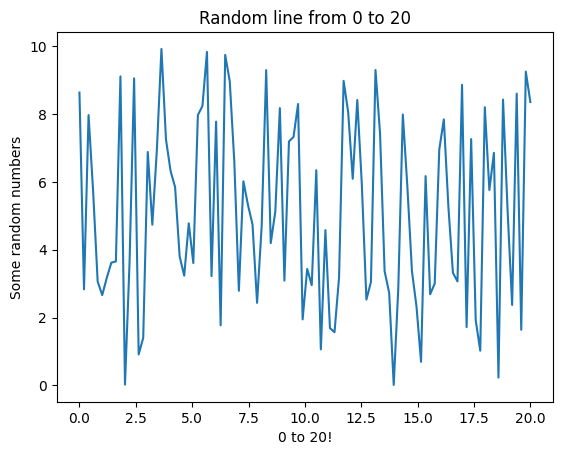

In [41]:
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(0, 20, 100)
Y = np.random.rand(100) * 10

fig, ax = plt.subplots()
ax.plot(X, Y)
ax.set(title='Random line from 0 to 20',
       xlabel='0 to 20!',
       ylabel='Some random numbers')

plt.show()

What kind of plot is created can be changed by using another function instead of `ax.plot()`. Let's check the **histograms** of our mouse data by using `ax.hist()`.

> 1. Plot histograms of nose-nose and nose-tail features as two separate plots. Set informative axis titles. Does it look like there is a difference between the the resident and intruder mice behavior?

> 2. Color can be changed using the `color` parameter in the `ax.hist()` function (`ax.plot()` also allows this parameter). Plot both nose-tail distributions on the same plot, but with different colors.

> 3. Reduce the opacity of bins by using the `alpha` parameter (set it to 0.5). Increase the number of bins using the `bins` parameter (it is 10 by default, make it 20).

> 4. Add labels to the histograms by using the `label` parameter in the `ax.hist()` function. To show the labels, add `ax.legend()` command to plot the legend.

> 5. Vertical lines from top to bottom of the plot can be added using `ax.axvline()` with X values where to put the lines (a similar function for horizontal lines - `ax.axhline()`). Mark the median value on both histograms using dashed vertical lines. Dashes can be added using the `linestyle='--'` parameter.

> 6. Note that bins do not match between data - this is because the minimum and maximum values of mice are different. Make the bins completely overlap by adding the `range` parameter. It should go from 0 to the maximum value of both plotted features.

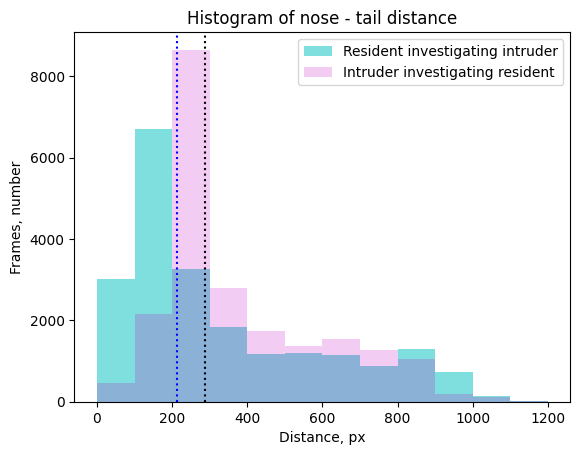

In [48]:
# your code
fig, ax = plt.subplots()
max_val = np.max((nosetail0, nosetail1))
                 
ax.hist(nosetail0, bins = range(0, int(max_val) + 100, 100), color = 'c', alpha = 0.5, label = 'Resident investigating intruder')
ax.hist(nosetail1, bins = range(0, int(max_val) + 100, 100), color = 'm', alpha = 0.2, label = 'Intruder investigating resident')

ax.axvline(np.median(nosetail0), color = 'b', linestyle = ":")
ax.axvline(np.median(nosetail1), color = 'k', linestyle = ":")

ax.set(title = 'Histogram of nose - tail distance',
       ylabel = 'Frames, number',
       xlabel = 'Distance, px')
ax.legend()

plt.show()


## Part 4.

The overall distribution is already informative - we see some clear differences between them. Does it change over time? In other words, do mice investigate each other less (or perhaps more) with time? This can be evaluated by calculating the cumulative sum: a straight line would indicate no time relationship, while a downward slope would show that the interest increases, and an upward slope would show a loss of interest.

> 1. A cumulative sum can be calculated using `np.cumsum()`. Calculate it for both nose-tail features, and plot them on the same plot as lineplots (using `ax.plot()`). Make sure they have different color, label them, and show the legend.

> 2. Add a line showing a linear relationship (generate values using `np.linspace()` from zero to the average of last values of cumulative features). How close this line is to cumulative lineplots?

In [ ]:
# your code

It would be nice to see both plots - histograms and cumulative lineplots - at the same figure near each other. Here, the figure-axis syntax comes in handy: we can add multiple axes to one figure and set the figure size in the `plt.subplots(row_num, col_num)` function. Then, the `ax` variable will contain an array of axis objects, which can be accessed by Numpy indexing:

```python
fig, ax = plt.subplots(5, 4)
# to plot something in the first row and column:
ax[0, 0].plot(...)
# or in the second row and last column:
ax[1, -1].plot(...)
```

> Plot both plots into a single figure. You may want to change the size of the figure by adding `figsize=()` parameter into the `plt.subplots()` function. `figsize` takes two integers.

In [53]:
# your code
resident_nose_x = keypoints[:, 0, :, 0]
resident_nose_y = keypoints[:, 0, :, 1]

## Part 5.

Let's check where the mice were in the arena. We'll generate a sort of a map using `ax.scatter()`, which creates a scatterplot by adding dots into (x,y) coordinates.

> Plot the coordinates of the noses of both mice. Mark them in different colors and give them a different label. Use a low alpha value to see where many dots overlap. Is there a visible pattern?

NameError: name 'ptl' is not defined

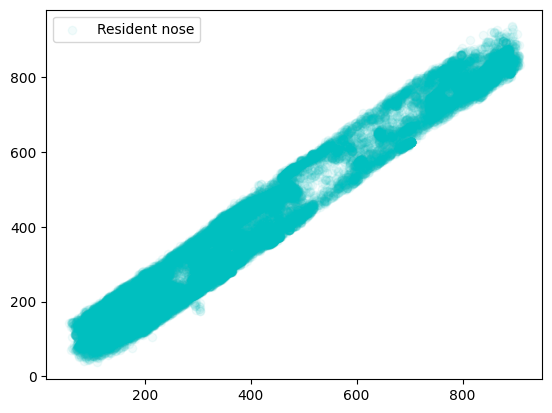

In [54]:
# you code
fig, ax = plt.subplots()

ax.scatter(resident_nose_x, resident_nose_y, alpha = 0.05, color = 'c', label = 'Resident nose')
ax.legend()




## Part 6.

Next, let's take a look at the categorical annotations. First, we'll see how much of each movement category is present in the data. To visualize this, `ax.barplot()` can be used. It needs two arguments: the names of bars, and their heights. Differently from the histogram plot, barplot heights are not calculated automatically from data. A convenient way to calculate bar heights is to use `np.unique(X, return_counts=True)`.

> 1. Create a barplot for all `annot` categories. The categories will be numbers, but for clarity, rename the bars according to category names which can be obtained from `trial['metadata']['vocab']`.

> 2. Add a text annotation above each bar which shows what percent of time this behavior took in the recording. First, obtain these percents by dividing the counts of categories be total length of data, then use `ax.text(x, y, 'text')` where `x` and `y` are the coordinates of the `'text'` in the plot. Use category counts to obtain `y` coordinates for this text, while `x` are just indices of the bars.

In [ ]:
# your code